In [5]:
import numpy as np
from PIL import Image
import torch
from transformers import TrainingArguments, Trainer

import os
print(os.chdir('/projects/li-lab/Yue/SpatialAnalysis/py/Her2dataExperiments'))

/projects/compsci/Yue/Anaconda3/envs/torch_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


None


In [6]:
import glob
import numpy as np
from datasets import Dataset, Image as ImageDs
#data_set = 'cifar10' ###epochs:10, 50, 100
#data_set = 'food101'  ###epochs: 10, 100
#data_set = 'cats_vs_dogs'  ###epochs:1000, 5000, 
#data_set = 'mnist'  ###epochs:1500, 2000

#list_of_files = glob.glob(f'{data_set}_validation_img_2stage_e{str(num_epoch)}/*.png')

data_set = 'Her2st'


In [7]:
import sys
sys.path.insert(1, '/projects/li-lab/Yue/SpatialAnalysis/py') ##~wont work, has to start with /Users
sys.path.insert(1, '/projects/li-lab/Yue/SpatialAnalysis/py/Her2dataExperiments') ##~wont work, has to start with /Users

import DataHer2ST_TumorClassification as DataObj

#2-fold cross validation
np.random.seed(0)
random_indx = np.random.choice(len(DataObj.X), len(DataObj.X)//2)

train_image_url = np.array(DataObj.X)[random_indx]
test_image_url = np.delete(np.array(DataObj.X), random_indx)
train_voxels = np.array(DataObj.voxel_ids)[random_indx]

train_labels = np.array(DataObj.Y_filtered)[random_indx]
test_labels = np.delete(np.array(DataObj.Y_filtered),random_indx)
test_voxels = np.delete(np.array(DataObj.voxel_ids),random_indx)



from datasets import Dataset

train_ds = Dataset.from_dict({"img": train_image_url, "label":train_labels.astype(int)}).cast_column("img", ImageDs())
val_ds = Dataset.from_dict({"img": test_image_url, "label":test_labels.astype(int)}).cast_column("img", ImageDs())

print(train_ds)
print(val_ds)

J1
9x20     cancer in situ
9x16     cancer in situ
10x20    cancer in situ
10x19    cancer in situ
10x13    cancer in situ
              ...      
9x14     cancer in situ
9x19     cancer in situ
9x15     cancer in situ
9x21       undetermined
9x18     cancer in situ
Name: label, Length: 254, dtype: object
F1
9x29    connective tissue
9x19      invasive cancer
9x13         undetermined
9x5       invasive cancer
9x27    connective tissue
              ...        
8x25    immune infiltrate
8x33         undetermined
8x2       invasive cancer
8x32      invasive cancer
8x29      invasive cancer
Name: label, Length: 691, dtype: object
8x6
7x26
10x28
10x2
8x9
12x27
20x11
31x16
7x11
6x25
20x9
29x16
12x28
13x17
4x13
11x28
5x10
16x7
11x27
4x16
10x11
13x29
4x6
9x9
11x26
8x11
5x7
7x12
23x8
9x31
7x16
29x22
4x10
10x26
8x13
10x30
12x14
29x11
7x13
4x9
17x7
4x17
10x12
26x29
23x12
3x13
29x23
10x16
29x20
7x10
23x11
5x16
9x30
13x7
3x11
13x8
7x9
13x28
4x7
5x11
14x14
10x6
8x7
13x31
26x12
7x18
10x17
15x31
30x

8x21
30x25
10x3
8x7
23x32
13x7
6x11
5x17
6x10
4x12
17x11
10x6
20x10
7x6
13x10
6x19
3x15
27x23
15x11
11x9
22x28
13x14
5x20
9x20
9x15
14x20
27x27
17x22
11x5
18x29
26x28
21x13
15x30
10x10
16x10
11x3
4x11
17x31
31x24
9x10
5x18
24x30
16x9
6x15
8x16
29x22
4x10
26x20
7x15
13x11
10x7
31x20
27x32
22x17
12x17
29x21
13x22
18x11
7x7
16x23
18x10
17x12
8x13
24x28
12x14
6x16
12x5
30x20
29x29
13x6
11x19
15x25
10x25
7x19
12x18
4x17
13x18
17x18
27x24
15x24
7x16
10x18
6x17
27x25
11x6
13x8
9x24
19x23
11x14
29x27
7x8
28x26
10x20
25x26
12x15
27x16
3x19
27x22
24x33
8x9
5x10
10x22
8x20
16x30
14x14
16x31
28x24
7x11
31x21
22x24
17x10
9x7
20x15
25x20
13x16
26x16
4x14
19x19
12x12
20x33
9x5
19x20
29x20
10x5
3x18
32x20
20x22
24x24
25x15
29x24
14x27
14x7
13x17
14x13
27x31
19x25
16x14
23x27
18x25
19x14
12x6
25x28
13x13
28x17
22x30
21x15
29x23
8x14
11x8
23x28
16x21
29x26
9x13
28x23
31x22
15x14
3x16
8x15
8x24
18x20
11x17
30x19
15x7
15x13
13x25
11x25
3x14
11x7
22x32
17x24
32x21
17x27
17x13
12x10
17x8
25x33
32x26
13x12
3

13x15
26x24
25x17
27x17
17x10
22x9
24x9
17x18
20x20
25x23
26x17
17x15
29x14
28x23
21x18
30x16
8x13
30x17
23x15
28x12
10x10
24x11
30x15
18x15
30x13
25x12
23x26
10x11
27x16
5x14
14x15
19x29
22x14
24x24
20x11
23x24
13x24
6x13
27x19
22x20
21x12
12x14
7x18
25x14
28x18
23x12
12x10
21x27
16x12
26x12
20x13
8x16
27x25
11x33
25x30
22x27
17x13
27x18
13x11
6x32
28x15
19x24
17x21
21x13
17x19
19x31
21x17
27x14
28x11
8x12
25x18
24x21
6x11
25x10
26x25
23x29
22x18
25x11
8x19
7x14
21x25
15x16
24x19
29x12
25x19
29x11
30x11
25x15
20x21
31x12
19x10
17x16
26x10
27x15
27x26
27x13
24x12
23x11
20x26
5x29
20x32
13x34
25x16
28x17
14x13
11x12
26x11
31x13
32x12
26x16
7x17
28x13
16x16
11x9
21x22
19x20
20x24
20x30
16x13
15x23
19x32
23x18
14x34
7x10
16x17
20x14
31x10
29x17
29x23
26x23
8x17
31x11
31x14
26x15
22x12
19x12
12x23
16x10
8x11
27x28
24x17
21x15
25x24
29x18
8x18
20x25
25x13
15x12
31x15
26x14
18x19
18x23
23x23
6x18
23x13
19x16
27x10
10x22
6x29
15x9
17x33
17x24
20x16
11x23
29x24
5x26
5x17
30x23
26x18
8x20
28x16

In [8]:
train_voxels

array(['H1_11x17', 'H1_27x26', 'E1_31x23', ..., 'F1_21x20', 'H1_30x18',
       'E1_16x7'], dtype='<U8')

In [7]:
random_indx

array([2732, 2607, 1653, ...,  437, 2820, 1216])

In [8]:
test_voxels

array(['F1_7x26', 'F1_10x28', 'F1_8x9', ..., 'C1_10x20', 'C1_13x23',
       'C1_23x19'], dtype='<U8')

In [9]:
diff_corr1 = []
diff_corr2= []

for i in range(500):
    f1 = f'{data_set}_tumorPred_train_img_Stage1/{train_voxels[i]}_train.png'
    im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
    f2 = f'{data_set}_tumorPred_validation_img_Stage2/{train_voxels[i]}_test.png'
    im_array2 = np.asarray(Image.open(f2).convert('RGB'))
    cor1 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
    #print(cor1)
    
    f1 = f'{data_set}_tumorPred_train_img_Stage2/{test_voxels[i]}_train.png'
    im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
    f2 = f'{data_set}_tumorPred_validation_img_Stage1/{test_voxels[i]}_test.png'
    im_array2 = np.asarray(Image.open(f2).convert('RGB'))
    cor2 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
    #print(cor2)
    diff_corr1.append(cor1)
    diff_corr2.append(cor2)




In [10]:
import pandas as pd
tavac_df1 = pd.DataFrame(diff_corr1)
tavac_df1['spot_id'] = train_voxels[0:500]
tavac_df1['stage'] = 'Stage1'

tavac_df1.columns = ['TAVAC','spot_id','stage']

In [11]:
import pandas as pd
tavac_df2 = pd.DataFrame(diff_corr2)
tavac_df2['spot_id'] = test_voxels[0:500]
tavac_df2['stage'] = 'Stage2'

tavac_df2.columns = ['TAVAC','spot_id','stage']

In [12]:
pd.set_option('display.max_rows', None)

tavac_df = tavac_df2.append(tavac_df1)
tavac_df.index = tavac_df['spot_id']
tavac_df = tavac_df.sort_values(by=['TAVAC'], ascending=False)

tavac_df


,TAVAC,spot_id,stage
spot_id,,,
H1_22x29,0.999685,H1_22x29,Stage1
H1_21x23,0.998873,H1_21x23,Stage1
G2_10x13,0.992467,G2_10x13,Stage2
G2_6x23,0.992275,G2_6x23,Stage2
B1_17x20,0.991828,B1_17x20,Stage1
A1_20x21,0.991615,A1_20x21,Stage1
G2_8x15,0.991361,G2_8x15,Stage2
G2_12x8,0.991109,G2_12x8,Stage2
A1_15x16,0.990909,A1_15x16,Stage1


In [13]:
tavac_df.to_csv('../../output/Her2_tavac.csv')

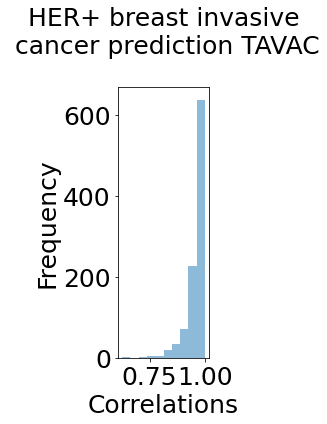

In [14]:
import matplotlib.pyplot as plt
font_size = 25

fig, ax = plt.subplots()
fig.set_size_inches(3,6)
plt.hist(tavac_df['TAVAC'], alpha = 0.5)
#plt.hist(diff_corr_overfit, alpha = 0.5, label = 'epoch=100')
#plt.hist(diff_corr_overfit100, alpha = 0.5, label = 'epoch=5000')
#plt.hist(diff_corr_overfit500, alpha = 0.5, label = 'epoch=500')

#plt.legend(loc='upper left', fontsize = font_size*0.8)
plt.ylabel('Frequency',fontsize=font_size)
plt.xlabel('Correlations',fontsize=font_size)
ax.set_title('HER+ breast invasive\n cancer prediction TAVAC\n',fontsize=font_size)
 
# Create names on the x-axis
#plt.xticks(x_pos, bars)
ax.tick_params(axis='x', labelsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)
plt.tight_layout()

In [27]:
import statistics
import numpy as np
def find_iqr(data):
    "Returns the interquartile range of a list of numbers"
    sorted_data = sorted(data)
    # numbers are sorted numerically
    q1 = np.percentile(sorted_data, 25)
    q3 = np.percentile(sorted_data, 75)
    iqr = q3 - q1
    print(f"q1: {q1}")
    print(f"q3: {q3}")
    return iqr
mean_corr = statistics.mean(tavac_df['TAVAC'])
median_corr = statistics.median(tavac_df['TAVAC'])
variance = np.var(tavac_df['TAVAC'])
iqr = (find_iqr(tavac_df['TAVAC']))
print(f"IQR: {iqr}")
print("Mean:", mean_corr)
print("Median:", median_corr)
print("Variance:", variance)

q1: 0.9493930973117117
q3: 0.9805672151573587
IQR: 0.031174117845646943
Mean: 0.9567282572659058
Median: 0.9709232980032472
Variance: 0.0016184889448808428


In [13]:
# diff_corr_overfit = []
# num_epoch = 100
# for i in range(500):
#     f1 = f'{data_set}_validation_img_2stage_e{str(num_epoch)}/{i}_test.png'
#     im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
#     f2 = f'{data_set}_train_img_e{str(num_epoch)}/{i}_train.png'
#     im_array2 = np.asarray(Image.open(f2).convert('RGB'))
#     cor1 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
#     #print(cor1)
    
#     f1 = f'{data_set}_train_img_2stage_e{str(num_epoch)}/{i}_train.png'
#     im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
#     f2 = f'{data_set}_validation_img_e{str(num_epoch)}/{i}_test.png'
#     im_array2 = np.asarray(Image.open(f2).convert('RGB'))
#     cor2 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
#     #print(cor2)
#     diff_corr_overfit.append(cor1)
#     diff_corr_overfit.append(cor2)


In [14]:
tavac_df.loc[tavac_df.spot_id=='A1_7x28']

,TAVAC,spot_id,stage
spot_id,,,
A1_7x28,0.966424,A1_7x28,Stage1


In [15]:
tavac_df.loc[tavac_df.spot_id=='F1_18x8']

,TAVAC,spot_id,stage
spot_id,,,
F1_18x8,0.625272,F1_18x8,Stage2


# TAVAC by rep

In [36]:
diff_corr1 = []
diff_corr2= []

rep = 'E1'
train_voxels_rep = [s for s in train_voxels if rep in s]
test_voxels_rep = [s for s in test_voxels if rep in s]



In [37]:
train_voxels_rep
#test_voxels_rep

['E1_31x23',
 'E1_31x27',
 'E1_17x16',
 'E1_28x16',
 'E1_32x27',
 'E1_9x6',
 'E1_25x20',
 'E1_29x25',
 'E1_4x19',
 'E1_18x23',
 'E1_27x26',
 'E1_27x22',
 'E1_23x23',
 'E1_15x22',
 'E1_25x29',
 'E1_11x6',
 'E1_13x21',
 'E1_20x26',
 'E1_31x25',
 'E1_24x19',
 'E1_22x16',
 'E1_5x11',
 'E1_20x23',
 'E1_15x13',
 'E1_13x20',
 'E1_10x25',
 'E1_9x5',
 'E1_22x31',
 'E1_5x18',
 'E1_15x15',
 'E1_28x28',
 'E1_14x25',
 'E1_10x8',
 'E1_11x10',
 'E1_32x24',
 'E1_12x12',
 'E1_26x18',
 'E1_11x27',
 'E1_25x31',
 'E1_21x21',
 'E1_7x21',
 'E1_17x28',
 'E1_11x12',
 'E1_14x23',
 'E1_4x12',
 'E1_5x11',
 'E1_22x33',
 'E1_29x19',
 'E1_22x15',
 'E1_26x25',
 'E1_4x10',
 'E1_14x21',
 'E1_11x17',
 'E1_22x32',
 'E1_22x18',
 'E1_6x16',
 'E1_23x28',
 'E1_13x16',
 'E1_5x11',
 'E1_20x14',
 'E1_23x31',
 'E1_26x33',
 'E1_8x9',
 'E1_28x21',
 'E1_13x18',
 'E1_14x26',
 'E1_11x9',
 'E1_17x30',
 'E1_16x13',
 'E1_12x18',
 'E1_6x17',
 'E1_14x18',
 'E1_19x13',
 'E1_16x20',
 'E1_13x19',
 'E1_26x31',
 'E1_15x23',
 'E1_12x23',
 'E1_

In [38]:
for vx in train_voxels_rep:
    print(vx)
    f1 = f'{data_set}_tumorPred_train_img_Stage1/{vx}_train.png'
    im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
    f2 = f'{data_set}_tumorPred_validation_img_Stage2/{vx}_test.png'
    im_array2 = np.asarray(Image.open(f2).convert('RGB'))
    cor1 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
    diff_corr1.append(cor1)

    
    #print(cor1)
for vx in test_voxels_rep:
    
    f1 = f'{data_set}_tumorPred_train_img_Stage2/{vx}_train.png'
    im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
    f2 = f'{data_set}_tumorPred_validation_img_Stage1/{vx}_test.png'
    im_array2 = np.asarray(Image.open(f2).convert('RGB'))
    cor2 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
    #print(cor2)
    diff_corr2.append(cor2)

E1_31x23
E1_31x27
E1_17x16
E1_28x16
E1_32x27
E1_9x6
E1_25x20
E1_29x25
E1_4x19
E1_18x23
E1_27x26
E1_27x22
E1_23x23
E1_15x22
E1_25x29
E1_11x6
E1_13x21
E1_20x26
E1_31x25
E1_24x19
E1_22x16
E1_5x11
E1_20x23
E1_15x13
E1_13x20
E1_10x25
E1_9x5
E1_22x31
E1_5x18
E1_15x15
E1_28x28
E1_14x25
E1_10x8
E1_11x10
E1_32x24
E1_12x12
E1_26x18
E1_11x27
E1_25x31
E1_21x21
E1_7x21
E1_17x28
E1_11x12
E1_14x23
E1_4x12
E1_5x11
E1_22x33
E1_29x19
E1_22x15
E1_26x25
E1_4x10
E1_14x21
E1_11x17
E1_22x32
E1_22x18
E1_6x16
E1_23x28
E1_13x16
E1_5x11
E1_20x14
E1_23x31
E1_26x33
E1_8x9
E1_28x21
E1_13x18
E1_14x26
E1_11x9
E1_17x30
E1_16x13
E1_12x18
E1_6x17
E1_14x18
E1_19x13
E1_16x20
E1_13x19
E1_26x31
E1_15x23
E1_12x23
E1_9x19
E1_14x12
E1_19x22
E1_15x13
E1_22x32
E1_16x16
E1_4x14
E1_9x13
E1_13x9
E1_18x11
E1_12x11
E1_12x5
E1_27x23
E1_20x19
E1_15x11
E1_8x5
E1_15x26
E1_18x30
E1_23x33
E1_31x27
E1_6x19
E1_21x19
E1_32x25
E1_21x17
E1_17x19
E1_3x13
E1_24x14
E1_12x27
E1_8x15
E1_26x21
E1_3x14
E1_21x22
E1_8x12
E1_12x27
E1_21x31
E1_10x22
E1_18

In [39]:
import pandas as pd
tavac_df1 = pd.DataFrame(diff_corr1)
tavac_df1['spot_id'] = train_voxels_rep
tavac_df1['stage'] = 'Stage1'

tavac_df1.columns = ['TAVAC','spot_id','stage']

import pandas as pd
tavac_df2 = pd.DataFrame(diff_corr2)
tavac_df2['spot_id'] = test_voxels_rep
tavac_df2['stage'] = 'Stage2'

tavac_df2.columns = ['TAVAC','spot_id','stage']

pd.set_option('display.max_rows', None)

tavac_df = tavac_df2.append(tavac_df1)
tavac_df.index = tavac_df['spot_id']
tavac_df = tavac_df.sort_values(by=['TAVAC'], ascending=False)

tavac_df
tavac_df.to_csv('../../output/Her2_tavac_' + rep + '.csv')

In [35]:
len(train_voxels_rep)

150

In [16]:
# diff_corr_overfit100 = []
# num_epoch = 3000
# for i in range(500):
#     f1 = f'{data_set}_validation_img_2stage_e{str(num_epoch)}/{i}_test.png'
#     im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
#     f2 = f'{data_set}_train_img_e{str(num_epoch)}/{i}_train.png'
#     im_array2 = np.asarray(Image.open(f2).convert('RGB'))
#     cor1 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
#     #print(cor1)
    
#     f1 = f'{data_set}_train_img_2stage_e{str(num_epoch)}/{i}_train.png'
#     im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
#     f2 = f'{data_set}_validation_img_e{str(num_epoch)}/{i}_test.png'
#     im_array2 = np.asarray(Image.open(f2).convert('RGB'))
#     cor2 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
#     #print(cor2)
#     diff_corr_overfit100.append(cor1)
#     diff_corr_overfit100.append(cor2)


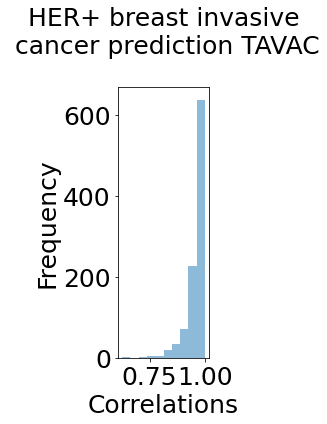

In [13]:
tst_patient = 'Stage1'
#tst_patient = 'Stage2'

vs2
27
vs2
34
vs2
56
vs1
71
vs2
98
vs1
99
vs1
141
vs2
214
vs2
251
vs1
297
vs2
305
vs2
343
vs2
380
vs2
463


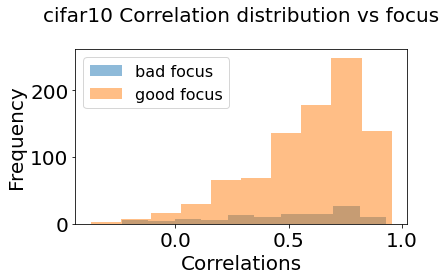

In [8]:
######bad focus tavac
import glob
import numpy as np
data_set = 'cifar10'
list_of_files1 = glob.glob("BadFocusImagesBadOnly-"+data_set+"/ValidationStage1/*.png")
list_of_files2 = glob.glob("BadFocusImagesBadOnly-"+data_set+"/ValidationStage2/*.png")


diff_corr_goodfocus = []
diff_corr_badfocus = []

v_stage1 = []
for f in list_of_files1:
    ar = f.split('/')
    image_id = int(ar[-1].replace('_test.png', ''))
    v_stage1.append(image_id)
    
v_stage2 = []
for f in list_of_files2:
    ar = f.split('/')
    image_id = int(ar[-1].replace('_test.png', ''))
    v_stage2.append(image_id)


for i in range(500):


    f1 = f'{data_set}_validation_img_2stage_e{str(num_epoch)}/{i}_test.png'
    im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
    f2 = f'{data_set}_train_img_e{str(num_epoch)}/{i}_train.png'
    im_array2 = np.asarray(Image.open(f2).convert('RGB'))
    cor1 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
    #print(cor1)
    
    f1 = f'{data_set}_train_img_2stage_e{str(num_epoch)}/{i}_train.png'
    im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
    f2 = f'{data_set}_validation_img_e{str(num_epoch)}/{i}_test.png'
    im_array2 = np.asarray(Image.open(f2).convert('RGB'))
    cor2 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
    #print(cor2)

    #if (i in v_stage2) and (i in WrongPred2[0]):
    if (i in v_stage2):
        if cor1 > 0.8:
            print('vs2')
            print(i)
        diff_corr_badfocus.append(cor1)
    else:
    #elif (i not in WrongPred2[0]):
        diff_corr_goodfocus.append(cor1)
        
    #if (i in v_stage1) and (i in WrongPred1[0]):
    if (i in v_stage1):
        if cor2 > 0.8:
            print('vs1')
            print(i)
        diff_corr_badfocus.append(cor2)
    else:
    #elif (i not in WrongPred1[0]):
        diff_corr_goodfocus.append(cor2)


import matplotlib.pyplot as plt
font_size = 20

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
plt.hist(diff_corr_badfocus, alpha = 0.5, label = 'bad focus')
plt.hist(diff_corr_goodfocus, alpha = 0.5, label = 'good focus')
#plt.hist(diff_corr_overfit100, alpha = 0.5, label = 'epoch=5000')
#plt.hist(diff_corr_overfit500, alpha = 0.5, label = 'epoch=500')

plt.legend(loc='upper left', fontsize = font_size*0.8)
plt.ylabel('Frequency',fontsize=font_size)
plt.xlabel('Correlations',fontsize=font_size)
ax.set_title(data_set + ' Correlation distribution vs focus\n',fontsize=font_size)
 
# Create names on the x-axis
#plt.xticks(x_pos, bars)
ax.tick_params(axis='x', labelsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)
plt.tight_layout()

In [11]:
import scipy

from scipy import stats

# Two-sample t-test
statistic, pvalue = stats.ttest_ind(diff_corr_badfocus,diff_corr_goodfocus)

print(f'Two-sample t-test: s = {statistic:5.3f}, p = {pvalue:5.5f}')


Two-sample t-test: s = -4.460, p = 0.00001


(array([0, 1]), [Text(0, 0, 'Bad'), Text(1, 0, 'Good')])

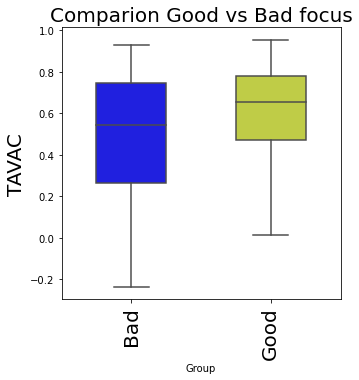

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_bad = pd.DataFrame(diff_corr_badfocus)
df_bad['Group'] = 'Bad'

df_good = pd.DataFrame(diff_corr_goodfocus)
df_good['Group'] = 'Good'

df = df_bad.append(df_good)
df.columns = ['TAVAC','Group']

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
my_pal = {"Good": "#d1e231", "Bad": "blue"}
sns.boxplot(x="Group",y="TAVAC",data=df,ax=ax,width=0.5, showfliers = False, palette=my_pal)
#sns.violinplot(x="Group",y="TAVAC",data=df,ax=ax,width=0.5, showfliers = False, palette=my_pal)

plt.ylabel('TAVAC',fontsize=font_size)
plt.title('Comparion Good vs Bad focus',fontsize=font_size)
plt.xticks(fontsize=font_size)

In [35]:
print("/projects/li-lab/Yue/SpatialAnalysis/py/DylanCode/BadFocusImages-"+data_set+"/ValidationStage1/*")

/projects/li-lab/Yue/SpatialAnalysis/py/DylanCode/BadFocusImages-cifar10/ValidationStage1/*


In [53]:
#########prediction accuracy vs TAVAC
from datasets import load_dataset
from sklearn.metrics import accuracy_score

# imports the load_dataset function from the datasets module. Datasets
# module is a powerful tool for loading and working with various datasets
# that are commonly used in machine learning and natural language processing tasks.

data_set = 'food101'
num_epoch = 100

if data_set == 'cifar10':
    train_ds, test_ds = load_dataset(data_set, split=['train[:1000]', 'test[:100]'])
    
if data_set == 'food101':
    
# load_dataset fuction is used to load the cifar10 dataset. 
# The data set is split into two subsets: 'train' and 'test'. 

splits = train_ds.train_test_split(test_size=0.5, seed=1024)
train_ds = splits['train']
val_ds = splits['test']

from torchvision.transforms import (CenterCrop, 
                                    Compose, 
                                    Normalize, 
                                    RandomHorizontalFlip,
                                    RandomResizedCrop, 
                                    Resize, 
                                    ToTensor)

from transformers import ViTImageProcessor
# the line imports the ViTImageProcessor from the transformers library. 
# The transformers library provides state-of-the-art pretrained models and utilities
# for natural language processing and computer vision tasks 

processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
image_mean, image_std = processor.image_mean, processor.image_std
size = processor.size["height"]

normalize = Normalize(mean=image_mean, std=image_std)
_train_transforms = Compose(
        [
            RandomResizedCrop(size),
            RandomHorizontalFlip(),
            ToTensor(),
            normalize,
        ]
    )

_val_transforms = Compose(
        [
            Resize(size),
            CenterCrop(size),
            ToTensor(),
            normalize,
        ]
    )

def train_transforms(examples):
    examples['pixel_values'] = [_train_transforms(image.convert("RGB")) for image in examples['img']]
    return examples

def val_transforms(examples):
    examples['pixel_values'] = [_val_transforms(image.convert("RGB")) for image in examples['img']]
    return examples

# Set the transforms
train_ds.set_transform(train_transforms)
# sets the transformation on the train_ds dataset to be train_transforms, 
# the function defined earlier

val_ds.set_transform(val_transforms)
# it sets the transformation for the validation dataset to be val_transforms
# This means that when retrieving examples from the validation dataset, 
# val_transforms functionn will be applied to preprocess the images

test_ds.set_transform(val_transforms)
# val_transfomrs function is applied to preprocess images in test dataset 


# By setting the transformations for each dataset, 
# you ensure that the appropriate preprocessing steps are automatically applied to the images
# from the respective datasets during training, validation, or testing. 
# These transformations could include resizing, cropping, flipping, and normalization, 
# as defined in the train_transforms and val_transforms functions.

import os
num_epoch = 100
#os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:1024"
#os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "1024"
torch.cuda.empty_cache()
#print(torch.cuda.memory_summary(device='cuda:0', abbreviated=False))
#os.environ['CUDA_VISIBLE_DEVICES']=''

if torch.cuda.is_available(): 
    dev = "cuda:0" 
else: 
    dev = "cpu"

device = torch.device(dev)
# These lines import the necessary classes, 'TrainingArguments' and 'Trainer',
# from the 'transformers' library. 
# These classes provide functionalities from configuring and executing the 
# training process for machine learning models.

metric_name = "accuracy"

# variable is set 'accuracy'
# This variable represents the name of the metric that will be used
# to evaluate performance of the model during training and determine 
# the best model based on this metric. 


from torch.utils.data import DataLoader
import torch

def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return dict(accuracy=accuracy_score(predictions, labels))

args = TrainingArguments(
    f'{data_set}_checkpoints_stage2',
    save_strategy="no",
    evaluation_strategy="no",
    learning_rate=1e-3,
#     2e-5
    #0.0001
    per_device_train_batch_size=128,
#     10
    #32
    per_device_eval_batch_size=4,
    num_train_epochs=num_epoch,
    weight_decay=0,
#     it was 0.01
    #0 FOR OVERFIIY
    load_best_model_at_end=False,
    metric_for_best_model=metric_name,
    logging_dir='logs',
    remove_unused_columns=False,
    seed = 42,
    adam_beta1 = 0.9,
    adam_beta2 = 0.9,
    lr_scheduler_type = 'cosine',
    max_grad_norm = 1,
    logging_strategy = 'epoch'
)


#device = 'cpu'
model_file = "../../saved_models/ViT_pretrained_"+data_set+"_e"+str(num_epoch)+"_stage1.pt"
#model_file = "ViT_umap_Cluster_c7_C1D1_ep10k_"+region+'.h5'

model = torch.load(model_file, map_location=device)
model.eval()

import torch
# this code imports the torch library 

trainer = Trainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    tokenizer=processor,
    
)

Found cached dataset food101 (/home/c-zhaoy/.cache/huggingface/datasets/food101/default/0.0.0/7cebe41a80fb2da3f08fcbef769c8874073a86346f7fb96dc0847d4dfc318295)

100%|██████████| 1/1 [00:00<00:00, 181.71it/s]


ValueError: not enough values to unpack (expected 2, got 1)

In [14]:
outputs = trainer.predict(val_ds)


/projects/compsci/Yue/Anaconda3/envs/torch_env/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


In [15]:
outputs

PredictionOutput(predictions=array([[-1.2274655 , -0.8324636 ,  0.51436174, ..., -0.2601912 ,
        -1.8889956 , -1.1408628 ],
       [-1.4803787 , -1.2076844 ,  7.1962547 , ..., -1.7827437 ,
        -0.85984015, -0.7727571 ],
       [-1.965032  , -2.1265604 , -1.7806085 , ..., -0.1056674 ,
        -2.3420134 , -1.6566886 ],
       ...,
       [ 4.640109  , -0.7434755 , -0.06031903, ..., -2.0873377 ,
        -1.5931362 ,  3.8213887 ],
       [ 6.2218304 , -1.1340549 , -1.0479712 , ...,  0.62805706,
        -0.46183303, -1.8312186 ],
       [-1.2696077 , -1.69223   , -2.5742226 , ...,  5.0449924 ,
        -1.2569945 , -2.1302776 ]], dtype=float32), label_ids=array([6, 2, 3, 9, 4, 0, 1, 8, 3, 6, 5, 2, 4, 2, 4, 7, 3, 5, 1, 3, 1, 2,
       3, 6, 9, 6, 8, 2, 0, 9, 2, 6, 6, 9, 4, 4, 5, 9, 3, 9, 4, 8, 2, 1,
       1, 0, 1, 3, 7, 0, 3, 1, 4, 6, 0, 6, 9, 0, 5, 6, 5, 7, 9, 0, 1, 5,
       5, 6, 8, 3, 6, 5, 3, 7, 4, 3, 6, 7, 2, 3, 9, 2, 9, 5, 1, 7, 5, 9,
       1, 3, 1, 4, 3, 8, 0, 9, 6, 9, 1, 

In [16]:
pred = outputs.predictions.argmax(1)

ifCorrect1 = (pred == outputs.label_ids)
WrongPred1 = np.where(~ifCorrect1)

In [17]:
len(WrongPred1[0])/500

0.312

In [18]:
pred

array([3, 2, 5, 9, 4, 3, 1, 8, 5, 6, 5, 2, 5, 2, 4, 7, 5, 5, 1, 3, 1, 2,
       6, 6, 9, 4, 8, 3, 0, 9, 4, 6, 6, 8, 4, 4, 5, 9, 2, 9, 6, 8, 7, 1,
       1, 3, 1, 5, 7, 0, 6, 1, 4, 6, 0, 6, 9, 9, 4, 6, 5, 4, 9, 0, 3, 5,
       5, 6, 8, 7, 6, 6, 3, 7, 4, 2, 6, 7, 4, 3, 0, 0, 9, 5, 9, 7, 7, 9,
       1, 5, 1, 4, 5, 4, 0, 9, 6, 4, 0, 7, 2, 4, 5, 1, 0, 4, 9, 1, 2, 5,
       0, 0, 1, 5, 4, 1, 3, 2, 7, 4, 2, 8, 4, 6, 4, 0, 8, 9, 5, 4, 1, 0,
       1, 2, 4, 5, 8, 0, 0, 4, 8, 7, 6, 4, 1, 9, 2, 4, 5, 8, 6, 6, 8, 4,
       3, 4, 7, 4, 6, 4, 0, 0, 5, 5, 0, 2, 4, 3, 9, 4, 4, 9, 5, 6, 4, 3,
       8, 6, 1, 4, 4, 3, 1, 3, 7, 0, 4, 5, 5, 1, 4, 4, 5, 7, 7, 0, 7, 1,
       5, 4, 5, 5, 8, 1, 0, 2, 3, 8, 3, 6, 5, 2, 6, 3, 4, 4, 0, 5, 1, 4,
       0, 7, 2, 8, 0, 9, 0, 4, 5, 6, 9, 2, 6, 1, 8, 4, 5, 0, 9, 0, 5, 3,
       4, 4, 5, 4, 4, 5, 3, 3, 3, 5, 6, 8, 5, 5, 0, 6, 1, 0, 4, 4, 6, 5,
       9, 4, 8, 7, 0, 1, 2, 8, 5, 2, 7, 4, 5, 1, 9, 5, 8, 1, 1, 3, 5, 7,
       6, 9, 9, 9, 6, 8, 0, 5, 1, 8, 2, 6, 4, 6, 6,

In [19]:
outputs.label_ids

array([6, 2, 3, 9, 4, 0, 1, 8, 3, 6, 5, 2, 4, 2, 4, 7, 3, 5, 1, 3, 1, 2,
       3, 6, 9, 6, 8, 2, 0, 9, 2, 6, 6, 9, 4, 4, 5, 9, 3, 9, 4, 8, 2, 1,
       1, 0, 1, 3, 7, 0, 3, 1, 4, 6, 0, 6, 9, 0, 5, 6, 5, 7, 9, 0, 1, 5,
       5, 6, 8, 3, 6, 5, 3, 7, 4, 3, 6, 7, 2, 3, 9, 2, 9, 5, 1, 7, 5, 9,
       1, 3, 1, 4, 3, 8, 0, 9, 6, 9, 1, 2, 2, 4, 5, 1, 0, 6, 9, 8, 2, 5,
       1, 0, 1, 5, 0, 1, 1, 2, 7, 2, 2, 8, 4, 6, 4, 0, 8, 1, 3, 4, 1, 0,
       1, 3, 7, 5, 8, 0, 0, 2, 8, 7, 6, 7, 1, 1, 2, 4, 5, 1, 5, 2, 8, 4,
       3, 6, 7, 2, 5, 4, 0, 1, 3, 1, 0, 2, 8, 5, 9, 4, 4, 9, 5, 6, 2, 6,
       8, 6, 1, 2, 4, 7, 1, 3, 7, 0, 6, 5, 5, 1, 4, 4, 5, 7, 7, 0, 7, 1,
       2, 2, 5, 5, 8, 1, 0, 3, 3, 8, 3, 6, 5, 2, 6, 3, 4, 4, 0, 5, 1, 2,
       0, 7, 2, 8, 0, 9, 2, 4, 9, 6, 9, 2, 6, 1, 8, 9, 3, 0, 1, 0, 2, 3,
       0, 4, 5, 4, 4, 5, 3, 3, 3, 3, 2, 8, 5, 3, 0, 6, 1, 8, 4, 4, 1, 5,
       9, 4, 8, 3, 0, 1, 2, 8, 2, 2, 7, 4, 3, 1, 3, 5, 8, 1, 1, 5, 5, 7,
       6, 9, 9, 9, 0, 8, 0, 5, 1, 8, 0, 6, 4, 6, 2,

In [20]:
val_ds[:]['label']

[6,
 2,
 3,
 9,
 4,
 0,
 1,
 8,
 3,
 6,
 5,
 2,
 4,
 2,
 4,
 7,
 3,
 5,
 1,
 3,
 1,
 2,
 3,
 6,
 9,
 6,
 8,
 2,
 0,
 9,
 2,
 6,
 6,
 9,
 4,
 4,
 5,
 9,
 3,
 9,
 4,
 8,
 2,
 1,
 1,
 0,
 1,
 3,
 7,
 0,
 3,
 1,
 4,
 6,
 0,
 6,
 9,
 0,
 5,
 6,
 5,
 7,
 9,
 0,
 1,
 5,
 5,
 6,
 8,
 3,
 6,
 5,
 3,
 7,
 4,
 3,
 6,
 7,
 2,
 3,
 9,
 2,
 9,
 5,
 1,
 7,
 5,
 9,
 1,
 3,
 1,
 4,
 3,
 8,
 0,
 9,
 6,
 9,
 1,
 2,
 2,
 4,
 5,
 1,
 0,
 6,
 9,
 8,
 2,
 5,
 1,
 0,
 1,
 5,
 0,
 1,
 1,
 2,
 7,
 2,
 2,
 8,
 4,
 6,
 4,
 0,
 8,
 1,
 3,
 4,
 1,
 0,
 1,
 3,
 7,
 5,
 8,
 0,
 0,
 2,
 8,
 7,
 6,
 7,
 1,
 1,
 2,
 4,
 5,
 1,
 5,
 2,
 8,
 4,
 3,
 6,
 7,
 2,
 5,
 4,
 0,
 1,
 3,
 1,
 0,
 2,
 8,
 5,
 9,
 4,
 4,
 9,
 5,
 6,
 2,
 6,
 8,
 6,
 1,
 2,
 4,
 7,
 1,
 3,
 7,
 0,
 6,
 5,
 5,
 1,
 4,
 4,
 5,
 7,
 7,
 0,
 7,
 1,
 2,
 2,
 5,
 5,
 8,
 1,
 0,
 3,
 3,
 8,
 3,
 6,
 5,
 2,
 6,
 3,
 4,
 4,
 0,
 5,
 1,
 2,
 0,
 7,
 2,
 8,
 0,
 9,
 2,
 4,
 9,
 6,
 9,
 2,
 6,
 1,
 8,
 9,
 3,
 0,
 1,
 0,
 2,
 3,
 0,
 4,
 5,
 4,
 4,
 5,
 3,
 3,


In [21]:
#device = 'cpu'
model_file = "../../saved_models/ViT_pretrained_"+data_set+"_e"+str(num_epoch)+"_stage2.pt"
#model_file = "ViT_umap_Cluster_c7_C1D1_ep10k_"+region+'.h5'

model = torch.load(model_file, map_location=device)
model.eval()

import torch
# this code imports the torch library 

trainer = Trainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    tokenizer=processor,
    
)
outputs = trainer.predict(train_ds)
pred = np.argmax(outputs.predictions, axis=1)
ifCorrect2 = (pred == outputs.label_ids)
WrongPred2 = np.where(~ifCorrect2)

/projects/compsci/Yue/Anaconda3/envs/torch_env/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


In [22]:
len(WrongPred2[0])/500

0.338

In [23]:
outputs

PredictionOutput(predictions=array([[-1.7519224 , -2.9132469 ,  0.5143461 , ...,  0.06652245,
        -2.0072675 , -0.45302278],
       [ 0.723398  , -2.1083522 , -2.3370385 , ...,  1.4343268 ,
         5.4178166 ,  3.6119552 ],
       [-1.9143302 , -2.286893  , -0.52769357, ...,  0.14700188,
        -2.335131  , -0.7777597 ],
       ...,
       [-1.9499127 ,  1.3425047 ,  1.9172846 , ...,  0.9368258 ,
        -1.5234579 , -1.8670794 ],
       [ 8.117343  ,  0.07401466, -0.41467786, ...,  0.02531048,
        -0.72633845, -1.1132731 ],
       [ 0.19731843,  3.6166046 , -1.5245739 , ..., -1.2598808 ,
        -0.5607851 ,  6.471668  ]], dtype=float32), label_ids=array([4, 9, 4, 6, 1, 1, 2, 0, 5, 8, 6, 4, 7, 3, 8, 9, 9, 4, 8, 6, 3, 4,
       6, 1, 1, 7, 9, 7, 4, 5, 3, 1, 4, 1, 7, 9, 7, 2, 0, 4, 5, 2, 2, 9,
       5, 8, 4, 6, 1, 2, 4, 2, 5, 2, 1, 7, 2, 5, 0, 1, 3, 9, 4, 7, 1, 0,
       9, 2, 1, 6, 7, 4, 3, 4, 4, 2, 4, 8, 1, 8, 9, 1, 0, 4, 2, 4, 9, 3,
       7, 2, 0, 5, 5, 9, 6, 0, 9, 8, 1, 

In [24]:
pred

array([4, 8, 4, 6, 1, 1, 4, 8, 5, 8, 6, 7, 5, 5, 2, 8, 9, 4, 8, 6, 3, 7,
       6, 1, 1, 7, 9, 7, 4, 5, 3, 1, 7, 1, 7, 9, 7, 3, 8, 4, 4, 2, 2, 8,
       2, 0, 4, 3, 1, 6, 4, 8, 2, 7, 1, 7, 2, 5, 4, 1, 6, 9, 9, 7, 1, 0,
       9, 2, 1, 8, 7, 4, 5, 4, 4, 2, 6, 8, 1, 8, 1, 1, 8, 6, 2, 2, 9, 4,
       7, 2, 8, 5, 3, 9, 6, 0, 1, 8, 1, 8, 8, 8, 0, 0, 3, 2, 6, 2, 9, 5,
       7, 3, 7, 7, 8, 5, 4, 0, 9, 2, 6, 9, 0, 6, 0, 9, 2, 2, 2, 1, 1, 6,
       0, 3, 6, 4, 5, 1, 4, 7, 4, 6, 0, 5, 2, 8, 0, 9, 2, 4, 5, 9, 0, 8,
       9, 9, 0, 3, 4, 9, 2, 9, 8, 5, 4, 6, 3, 2, 0, 6, 3, 2, 9, 8, 6, 2,
       2, 0, 8, 3, 5, 6, 1, 7, 4, 0, 8, 8, 2, 1, 6, 1, 1, 7, 8, 0, 8, 2,
       2, 7, 6, 9, 0, 4, 2, 2, 3, 6, 8, 4, 1, 7, 9, 1, 6, 2, 7, 4, 1, 4,
       7, 4, 8, 0, 4, 2, 2, 6, 4, 8, 1, 6, 2, 7, 1, 1, 7, 6, 5, 2, 8, 9,
       1, 2, 4, 4, 7, 6, 6, 6, 5, 6, 0, 6, 6, 8, 7, 0, 4, 2, 4, 2, 5, 8,
       5, 8, 0, 9, 6, 4, 7, 8, 1, 2, 7, 3, 2, 9, 6, 0, 7, 4, 4, 4, 7, 9,
       1, 1, 9, 7, 6, 3, 7, 5, 2, 1, 5, 8, 8, 1, 0,

In [25]:
train_ds[:]['label']

[4,
 9,
 4,
 6,
 1,
 1,
 2,
 0,
 5,
 8,
 6,
 4,
 7,
 3,
 8,
 9,
 9,
 4,
 8,
 6,
 3,
 4,
 6,
 1,
 1,
 7,
 9,
 7,
 4,
 5,
 3,
 1,
 4,
 1,
 7,
 9,
 7,
 2,
 0,
 4,
 5,
 2,
 2,
 9,
 5,
 8,
 4,
 6,
 1,
 2,
 4,
 2,
 5,
 2,
 1,
 7,
 2,
 5,
 0,
 1,
 3,
 9,
 4,
 7,
 1,
 0,
 9,
 2,
 1,
 6,
 7,
 4,
 3,
 4,
 4,
 2,
 4,
 8,
 1,
 8,
 9,
 1,
 0,
 4,
 2,
 4,
 9,
 3,
 7,
 2,
 0,
 5,
 5,
 9,
 6,
 0,
 9,
 8,
 1,
 8,
 8,
 0,
 8,
 0,
 5,
 2,
 4,
 2,
 7,
 5,
 7,
 6,
 7,
 0,
 0,
 5,
 7,
 0,
 0,
 2,
 6,
 5,
 0,
 3,
 0,
 7,
 3,
 2,
 6,
 1,
 9,
 3,
 0,
 5,
 6,
 4,
 5,
 1,
 6,
 7,
 4,
 3,
 8,
 5,
 8,
 9,
 0,
 2,
 2,
 2,
 5,
 9,
 0,
 8,
 9,
 9,
 0,
 3,
 4,
 9,
 2,
 1,
 8,
 5,
 4,
 3,
 3,
 0,
 0,
 5,
 3,
 0,
 9,
 8,
 6,
 3,
 5,
 0,
 8,
 7,
 5,
 6,
 9,
 2,
 5,
 0,
 8,
 1,
 2,
 1,
 6,
 1,
 1,
 7,
 8,
 0,
 8,
 8,
 2,
 7,
 6,
 9,
 0,
 4,
 2,
 2,
 3,
 6,
 8,
 4,
 9,
 7,
 9,
 1,
 6,
 1,
 5,
 4,
 1,
 4,
 7,
 4,
 9,
 0,
 7,
 2,
 7,
 6,
 5,
 0,
 9,
 6,
 2,
 9,
 1,
 1,
 0,
 6,
 5,
 6,
 8,
 9,
 5,
 2,
 5,
 4,
 7,
 6,
 6,
 6,


In [26]:


diff_corr1 = [] #model stage 1
diff_corr2 = [] #model stage 2
num_epoch = 100
for i in range(500):
    f1 = f'{data_set}_validation_img_2stage_e{str(num_epoch)}/{i}_test.png'
    im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
    f2 = f'{data_set}_train_img_e{str(num_epoch)}/{i}_train.png'
    im_array2 = np.asarray(Image.open(f2).convert('RGB'))
    cor1 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
    #print(cor1)
    
    f1 = f'{data_set}_train_img_2stage_e{str(num_epoch)}/{i}_train.png'
    im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
    f2 = f'{data_set}_validation_img_e{str(num_epoch)}/{i}_test.png'
    im_array2 = np.asarray(Image.open(f2).convert('RGB'))
    cor2 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
    #print(cor2)
    diff_corr2.append(cor1)
    diff_corr1.append(cor2)


/tmp/ipykernel_169131/1725388961.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Group'][df2['Group'] == 0] = 'Wrong'
/tmp/ipykernel_169131/1725388961.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Group'][df2['Group'] == 1] = 'Correct'


Text(0.5, 1.0, 'Prediction vs TAVAC')

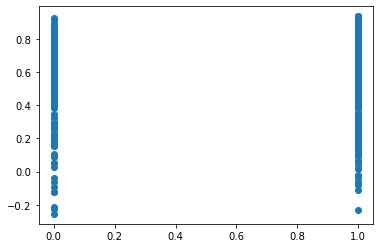

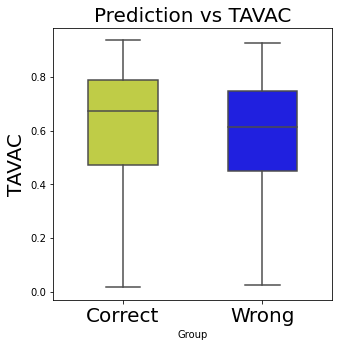

In [44]:
import matplotlib.pyplot as plt

plt.scatter(ifCorrect2, diff_corr2)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df2 = pd.DataFrame(diff_corr2)
df2['Group'] = ifCorrect2
df2['Group'][df2['Group'] == 0] = 'Wrong'
df2['Group'][df2['Group'] == 1] = 'Correct'
df2.columns = ['TAVAC','Group']

# fig, ax = plt.subplots()
# fig.set_size_inches(5, 5)
# my_pal = {"Wrong": "blue", "Correct": "#d1e231"}
# sns.boxplot(x="Group",y="TAVAC",data=df2,ax=ax,width=0.5, showfliers = False, palette=my_pal)
# #sns.violinplot(x="Group",y="TAVAC",data=df,ax=ax,width=0.5, showfliers = False, palette=my_pal)

# plt.ylabel('TAVAC',fontsize=font_size)
# plt.xticks(fontsize=font_size)
# plt.title('Prediction vs TAVAC', fontsize=font_size)

In [28]:
import scipy

from scipy import stats

# Two-sample t-test
statistic, pvalue = stats.ttest_ind(df['TAVAC'][df['Group'] == 'Wrong'],df['TAVAC'][df['Group'] == 'Correct'])

print(f'Two-sample t-test: s = {statistic:5.3f}, p = {pvalue:5.5f}')

Two-sample t-test: s = -2.062, p = 0.03970


/tmp/ipykernel_169131/940968029.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Group'][df1['Group'] == 0] = 'Wrong'
/tmp/ipykernel_169131/940968029.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Group'][df1['Group'] == 1] = 'Correct'


(array([0, 1]), [Text(0, 0, 'Wrong'), Text(1, 0, 'Correct')])

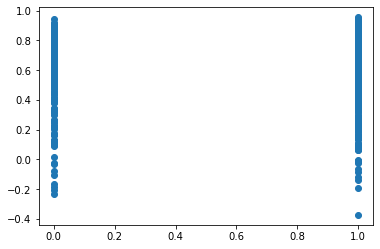

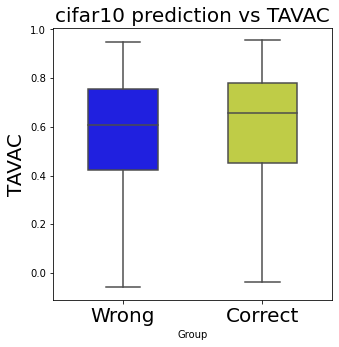

In [45]:
import matplotlib.pyplot as plt

plt.scatter(ifCorrect1, diff_corr1)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df1 = pd.DataFrame(diff_corr1)
df1['Group'] = ifCorrect1
df1['Group'][df1['Group'] == 0] = 'Wrong'
df1['Group'][df1['Group'] == 1] = 'Correct'
df1.columns = ['TAVAC','Group']

df = df1.append(df2)
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
my_pal = {"Wrong": "blue", "Correct": "#d1e231"}
sns.boxplot(x="Group",y="TAVAC",data=df,ax=ax,width=0.5, showfliers = False, palette=my_pal)
#sns.violinplot(x="Group",y="TAVAC",data=df,ax=ax,width=0.5, showfliers = False, palette=my_pal)

plt.ylabel('TAVAC',fontsize=font_size)
plt.title(data_set+' prediction vs TAVAC',fontsize=font_size)
plt.xticks(fontsize=font_size)

In [43]:
df.shape

(1000, 2)

In [42]:
import scipy

from scipy import stats

# Two-sample t-test
statistic, pvalue = stats.ttest_ind(df['TAVAC'][df['Group'] == 'Wrong'],df['TAVAC'][df['Group'] == 'Correct'])

print(f'Two-sample t-test: s = {statistic:5.3f}, p = {pvalue:5.5f}')

Two-sample t-test: s = -2.253, p = 0.02450


In [31]:
id2label = {id:label for id, label in enumerate(train_ds.features['label'].names)}
# id2label is dictionnary. Enumerate fuction is used to iterate over the names of the class labels 
# in the 'label' feature of the'train_ds' dataset. For each label, the corresponding ID(index) is
# assigned as a key, and the labe itself is assiged as the value.

label2id = {label:id for id,label in id2label.items()}
# reverses the order of each key-value pair in the dictionary 

id2label

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

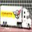

In [32]:
train_ds[499]['img']


In [33]:
id2label[val_ds[14]['label']]


'deer'

In [35]:
trainer.predict??